# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Amir Rashidi
- Amir Farhan
- Byungkwon Han
- Xiaotian Shi
- Jason Tam

# Group Members IDs

- A########
- A########
- A########
- A########

# Research Question

When is the best time for manufacturers to release a movie in the United States, in order to maximize revenue?

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


Although the revenue that a movie eventually earns depends on many different factors, it directly depends on how many tickets it can sell.<br>
<br>
Based on this, our first assumption is that a movie earns more if it is released during the leisure months of its targeted audiences. Thus, it will be more legitimate to compare movies within the same genre. We will be focusing on specific genre(s) when analyzing our data.<br>
<br>
Our second hypothesis, which follows the first, is that the revenue is also influenced by the release time relative to other events. Since people's money and time are limited, if the movie is released when there are other events (major social/entertainment events, or other popular movies) coming, people who originally plan to watch the movie may give up on it.<br>
<br>
The qualities of movies could be a potential confounding factor here, since it is natural for people to not watch movies that are rated badly. We will compare movies that are roughly at the same level, measuring primarily by the ratings.

# Dataset(s)

Dataset Name: The Numbers Domestic Boxoffice Dataset<br>
Link to the dataset: https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time<br>
Number of observations: 1100<br>
Description: This dataset contains 1100 bestseller movies along with their domestic, international, and worldwide box<br>offices. We will only be using the domestic box offices.

Dataset Name: OMDb Movie Dataset<br>
Link to the dataset: https://www.omdbapi.com<br>
Number of observations: 1098<br>
Description: This dataset contains IMDb, Metacritic, and Rotten Tomatoes ratings of the movies in the other dataset. It also contains <br>the release dates. 

We will join the two datasets on movie name in order to get the ratings, release dates, and box offices information in the same data frame.

# Setup

Before we start setting up and cleaning the data, we deleted 2 rows from The Numbers Domestic Boxoffice Dataset, because the form of the 2 rows make it hard to query data from OMDb. Moreover, after manually fixing the form, it seems that the result from OMDb to be containing all NaN values. Thus, we decided to remove those 2 rows. As a result, the joined dataset has 1098 rows.

In [32]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# omdb_joined.csv is the dataset resulting from joining the two raw datasets
df_omdb = pd.read_csv("./data/omdb_joined.csv")

# Data Cleaning

Describe your data cleaning steps here.

In [34]:
# Use the ranks as indices
# The unnamed columns, which represent the original indices, will be dropped
df_omdb.set_index('Rank', inplace=True)
df_omdb.drop(df_omdb.columns[df_omdb.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [35]:
# Rename the column names('Released' -> 'Year', 'Released Month' -> 'Month', 'IMDB Votes' -> 'IMDb Votes')
df_omdb.rename(index=str, columns={'Released': 'Year', 'Released Month': 'Month',
                                   'IMDB Votes': 'IMDb Votes'}, inplace=True)

In [36]:
# Count the number of NaN values in the 'Month' and 'DomesticBox Office' column
# These rows will be dropped because the release month and box offices are the primary targets
# that we will be exploring, without these values, the row is useless
naMonth = df_omdb['Month'].isna().sum()
naBoxOffice = df_omdb['DomesticBox Office'].isna().sum()
print('NaN Month count:', naMonth)
print('NaN Box Office count:', naBoxOffice)

NaN Month count: 2
NaN Box Office count: 0


The result of the last cell shows that we have 2 NaN values in the 'Month' column, and 0 NaN values in the 'DomesticBox Office' column. We will drop the two rows which contain NaN Months.

In [37]:
# Drop NaNs in Month column
# Convert the Month column to only containing release months
df_omdb.dropna(subset=['Month'], inplace=True)
for idx, row in df_omdb.iterrows():
    month = row['Month'][3:6]
    df_omdb.at[idx, 'Month'] = month

In [38]:
# Drop the columns 'InternationalBox Office' and 'WorldwideBox Office'
# Our question only concerns the domestic revenues, we won't need these two columns
df_omdb.drop(axis=1, columns=['InternationalBox Office', 'WorldwideBox Office'], inplace=True)

In [39]:
# Convert the 'DomesticBox Office' column to integers
for idx, row in df_omdb.iterrows():
    revenue = ''.join(filter(str.isdigit, row['DomesticBox Office']))
    df_omdb.at[idx, 'DomesticBox Office'] = revenue

df_omdb['DomesticBox Office'] = pd.to_numeric(df_omdb['DomesticBox Office'])

In [40]:
# Reorder the columns
df_omdb = df_omdb[['Movie', 'Genre', 'Year', 'Month', 'DomesticBox Office',
                   'IMDb Votes', 'IMDb Ratings', 'Metacritic', 'Rotten Tomatoes']]

In [41]:
# Check whether the dataframe is in good shape
print("Unique months:", df_omdb['Month'].unique())
print("Box Office Column dtype:", df_omdb['DomesticBox Office'].dtype)

Unique months: ['Dec' 'Feb' 'Apr' 'Jun' 'May' 'Jul' 'Mar' 'Nov' 'Jan' 'Aug' 'Sep' 'Oct']
Box Office Column dtype: int64


In [42]:
# save intermediate dataframe
df_omdb.to_csv('./data/omdb_cleaned.csv')

<b>Summary of Data Cleaning</b><br>
The two datasets are good enough that their data are already standardized. All the values in the DomesticBox Office column can be converted to int64 easily, and all values in the Month column all have the same format. Thus, our job on data cleaning is fairly simple<br>
<br>
<b>1. Pre-processsing:</b> 2 rows dropped from The Numbers Domestic Boxoffice Dataset (deleted directly in the file). Those two rows result in NaN values when querying the second dataset.<br>
<br>
<b>2. Columns Dropped:</b> 'InternationalBox Office', 'WorldwideBox Office'<br>
Our question concerns the domestic revenue of the movies. These two information in the data frame will not be used. We believe this will not affect the result because they are irrelevant.<br>
<br>
<b>3. Rows Dropped:</b> 2 rows where the 'Month' column contain NaN<br>
We have to drop these two rows because they do not contain a critical row of our interest. We are exploring the relationship between the release time and domestic revenue. Without the Month column the rows are useless.<br>
<br>
<b>4. Other informations dropped:</b> The exact release dates originally contained in the 'Month' column<br>
We dropped this information because we are not studying exact dates. Instead, we only care about the relationship between the release month and domestic revenue. Different release dates may also influence the revenue of a movie. However, because movies are often on show for several weeks, we decide to not consider this information. By doing this, we risk losing some information that might influence our result.

# Descriptive Analysis

Obtain the cleaned data. 

In [43]:
df = pd.read_csv('./data/omdb_cleaned.csv')

# Size

In [44]:
# Print the size of the data
num_movies,info = df.shape
print("Number of movies: ", num_movies)
print("Variables for each movie: ", info)

Number of movies:  1096
Variables for each movie:  10


# Missingness

In [45]:
# Output the number of null elemeents in each column of the data
df.isnull().sum()

Rank                   0
Movie                  0
Genre                  0
Year                   0
Month                  0
DomesticBox Office     0
IMDb Votes             0
IMDb Ratings           0
Metacritic            16
Rotten Tomatoes       24
dtype: int64

For ratings, we will not be using information from Metacritic or Rotten Tomatoes. Instead, we will only be using data from IMDb. Therefore, we will not have any missing data in our analysis.

# Shape

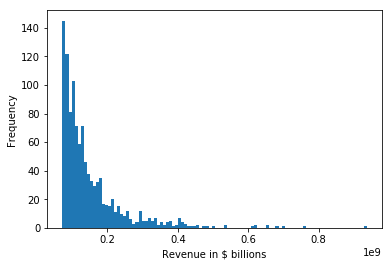

In [46]:
# Plot a histogram comparing the number of movies that make each revenue category
plt.figure()
plt.xlabel("Revenue in $ billions")
df['DomesticBox Office'].plot.hist(bins=100)

f1 = plt.gcf()

We can see from the graph that the data is heavily skewed right indicating that revenue is usually around 100 billion. 

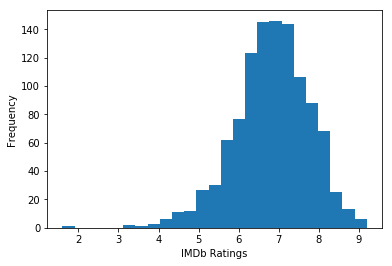

In [47]:
# Plot a histogram comparing the number of movies that get a certain rating on IMDb
plt.figure()
plt.xlabel("IMDb Ratings")
df['IMDb Ratings'].plot.hist(bins=25)

f2 = plt.gcf()

We can see from the graph that the data is normally distributed with a peak at 7.

# Central Tendency

Since the data for revenue is skewed, we will find the median for the following steps since mean will not be a good indicator of central tendency. The data for ratings is mostly normal so we can use mean for ratings because the mean will be around the middle of the data.

In [48]:
median_revenue = df['DomesticBox Office'].median()
mean_ratings = df['IMDb Ratings'].mean()
print("The median for revenues is $", median_revenue)
print("The mean for rating is ", mean_ratings)

The median for revenues is $ 118532934.0
The mean for rating is  6.806386861313871


# Variability

For revenue, we use IQR since our central tendency was calculated using median and std wouldn't be a good indication of variability with a skewed graph. For ratings, we use standard deviation because we can see how far our data is from a line of best fit.

In [49]:
lower_revenue,upper_revenue = np.percentile(df['DomesticBox Office'], [25,75])
iqr_revenue = upper_revenue - lower_revenue
print("The interquatile range for revenues is $", iqr_revenue)
std_ratings = df['IMDb Ratings'].std()
print("The standard deviation of ratings is ", std_ratings)

The interquatile range for revenues is $ 82755090.0
The standard deviation of ratings is  0.9275072361079982


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [50]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*